<a href="https://colab.research.google.com/github/rkrissada/100DayOfMLCode/blob/master/day_043_CNN_on_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import keras  
from keras.datasets import mnist 
from keras.models import Model 
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten 
from keras import backend as k 

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

11493376/11490434 [==============================] - 2s 0us/step


While proceeding further, img_rows and img_cols are used as the image dimensions. In mnist dataset, it is 28 and 28. We also need to check the data format i.e. ‘channels_first’ or ‘channels_last’. In CNN, we can normalize data before hands such that large terms of the calculations can be reduced to smaller terms. Like, we can normalize the x_train and x_test data by dividing it with 255.

In [0]:
img_rows, img_cols=28, 28

if k.image_data_format() == 'channels_first': 
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols) 
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols) 
  inpx = (1, img_rows, img_cols) 

else: 
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) 
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1) 
  inpx = (img_rows, img_cols, 1) 

x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 
x_train /= 255
x_test /= 255

In [0]:
y_train = keras.utils.to_categorical(y_train) 
y_test = keras.utils.to_categorical(y_test) 

In [5]:
inpx = Input(shape=inpx) 
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx) 
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1) 
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2) 
layer4 = Dropout(0.5)(layer3) 
layer5 = Flatten()(layer4) 
layer6 = Dense(250, activation='sigmoid')(layer5) 
layer7 = Dense(10, activation='softmax')(layer6) 

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model = Model([inpx], layer7) 
model.compile(optimizer=keras.optimizers.Adadelta(), 
              loss=keras.losses.categorical_crossentropy, 
              metrics=['accuracy']) 

#model_log = model.fit(x_train, y_train, epochs=12, batch_size=500) 

batch_size = 128
num_epoch = 10
#model training
model_log = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 235us/step - loss: 0.3240 - acc: 0.9027 - val_loss: 0.0794 - val_acc: 0.9764
Epoch 2/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.0862 - acc: 0.9744 - val_loss: 0.0476 - val_acc: 0.9842
Epoch 3/10
60000/60000 [==============================] - 9s 158us/step - loss: 0.0611 - acc: 0.9809 - val_loss: 0.0366 - val_acc: 0.9875
Epoch 4/10
60000/60000 [==============================] - 9s 155us/step - loss: 0.0485 - acc: 0.9852 - val_loss: 0.0303 - val_acc: 0.9901
Epoch 5/10
60000/60000 [==============================] - 10s 159us/step - loss: 0.0403 - acc: 0.9877 - val_loss: 0.0292 - val_acc: 0.9898
Epoch 6/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.0360 - acc: 0.9896 - val_loss: 0.0266 - val_acc: 0.9910
Epoch 7/10
60000/60000 [==============================] - 9s 156us/step 

In [8]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('loss=', score[0]) 
print('accuracy=', score[1]) 

loss= 0.023832524134521374
accuracy= 0.9922


In [9]:
history_dict = model_log.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

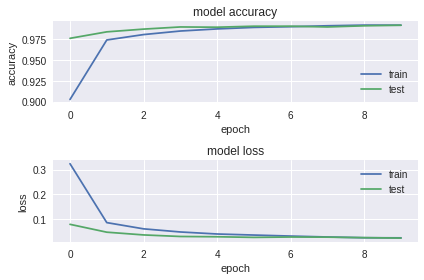

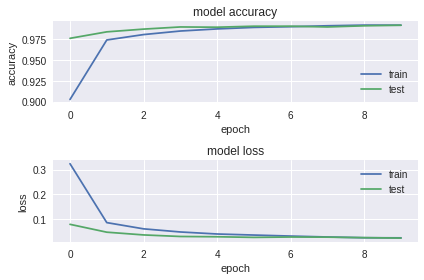

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
# plotting the metrics


acc = model_log.history['acc']
val_acc = model_log.history['val_acc']
loss = model_log.history['loss']
val_loss = model_log.history['val_loss']

fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig


In [11]:
#Save the model
# serialize model to JSON
model_digit_json = model.to_json()
with open("model_digit.json", "w") as json_file:
    json_file.write(model_digit_json)
# serialize weights to HDF5
model.save_weights("model_digit.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
!pwd

/content
